In [24]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARMA
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df = pd.read_csv('train_(2).csv',parse_dates=['Month'],index_col='Month')
df.head(15)

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142
1749-06-01,139
1749-07-01,158
1749-08-01,111
1749-09-01,127


In [9]:
df.shape

(3144, 1)

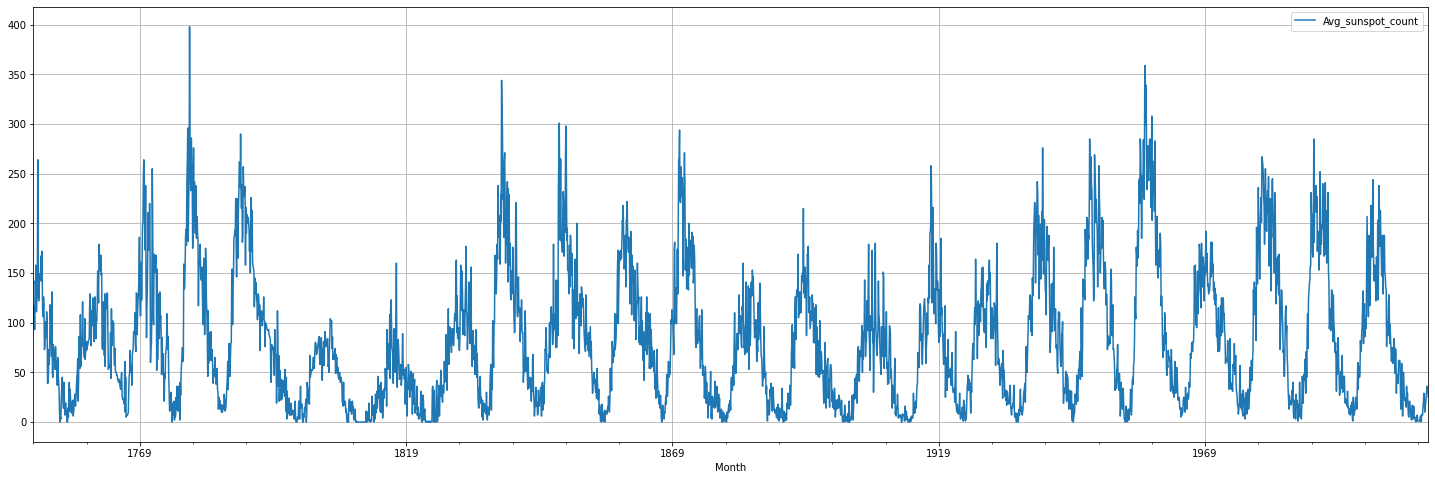

In [8]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

In [10]:
df.isnull().sum()

Avg_sunspot_count    0
dtype: int64

In [11]:
df_decompose = seasonal_decompose(df, model = 'additive')

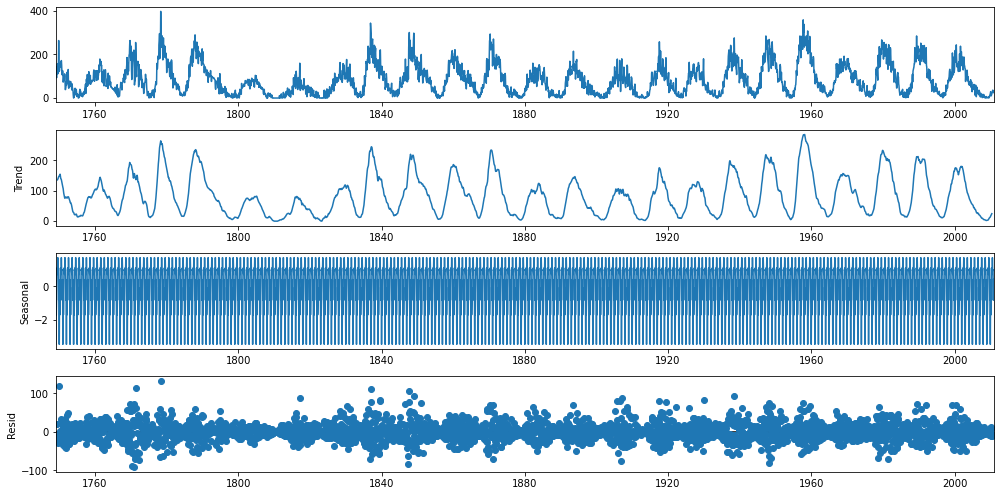

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
df_decompose.plot()
plt.show()

In [15]:
observations= df.values
test_result = adfuller(observations)

In [16]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -10.390309
p-value: 0.000000
Critical Values:
	1%: -3.43245
	5%: -2.86247
	10%: -2.56726


p value is less that 0.05 so the series is stationary

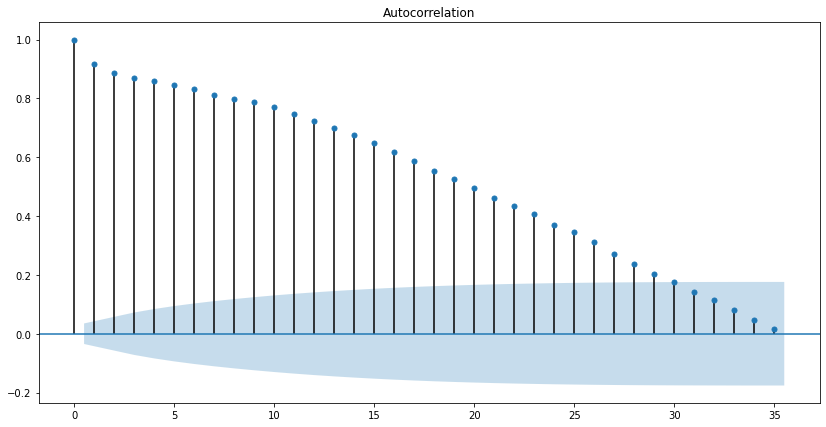

In [17]:
plot_acf(df);

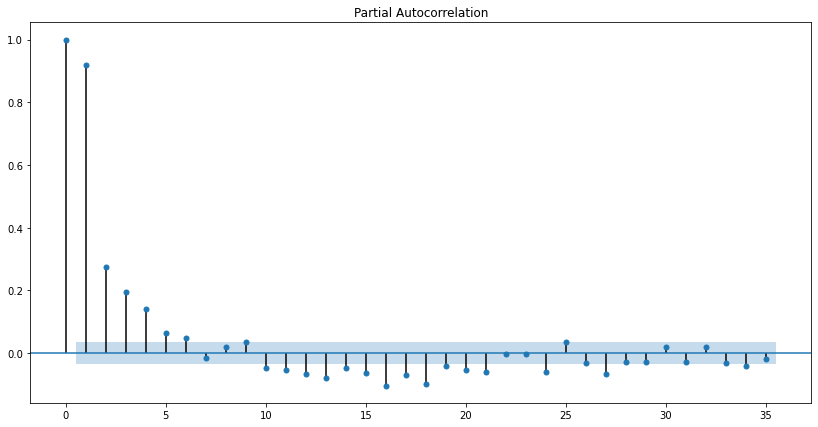

In [18]:
plot_pacf(df);

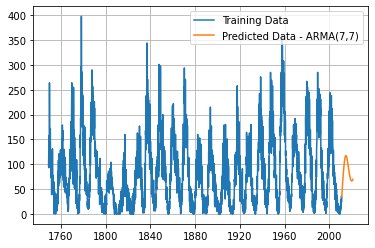

In [55]:
plt.plot(df,label='Training Data')
plt.plot(test.index,predictions,label='Predicted Data - ARMA(7,7)')
plt.legend(loc='best')
plt.grid();

In [2]:
import itertools


In [101]:
p = q = range(1, 8)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

In [3]:
a = b = range(4, 36)
c= range(0,2)
abc = list(itertools.product(a,b,c))

In [4]:
len(abc)

2048

In [102]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [103]:
for param in pdq:
            try:
                mod = ARIMA(df, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(1, 0, 1) - AIC:29306.11959150416
ARIMA(1, 0, 2) - AIC:29263.997873284687
ARIMA(1, 0, 3) - AIC:29265.96459572044
ARIMA(1, 0, 4) - AIC:29260.470915786376
ARIMA(1, 0, 5) - AIC:29261.29352887957
ARIMA(1, 0, 6) - AIC:29254.639240373624
ARIMA(1, 0, 7) - AIC:29255.208758067645
ARIMA(1, 1, 1) - AIC:29282.05059112158
ARIMA(1, 1, 2) - AIC:29279.686750738285
ARIMA(1, 1, 3) - AIC:29229.439984200108
ARIMA(1, 1, 4) - AIC:29211.001652732237
ARIMA(1, 1, 5) - AIC:29209.866757287113
ARIMA(1, 1, 6) - AIC:29203.990104233773
ARIMA(1, 1, 7) - AIC:29204.732426491006
ARIMA(2, 0, 1) - AIC:29268.567734351025
ARIMA(2, 0, 2) - AIC:29265.97976492264
ARIMA(2, 0, 3) - AIC:29129.122649352095
ARIMA(2, 0, 4) - AIC:29115.334733569238
ARIMA(2, 0, 5) - AIC:29116.777349535667
ARIMA(2, 0, 6) - AIC:29115.932439564058
ARIMA(2, 0, 7) - AIC:29117.863012098926
ARIMA(2, 1, 1) - AIC:29277.66615972355
ARIMA(2, 1, 2) - AIC:29201.66921300617
ARIMA(2, 1, 3) - AIC:29201.564918962875
ARIMA(2, 1, 4) - AIC:29200.55424547715
ARIMA(2,

In [104]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
55,"(4, 1, 7)",29084.480715
69,"(5, 1, 7)",29086.172404
68,"(5, 1, 6)",29086.335761
90,"(7, 0, 7)",29101.461017
59,"(5, 0, 4)",29103.261185
...,...,...
36,"(3, 1, 2)",29279.437500
64,"(5, 1, 2)",29279.493054
8,"(1, 1, 2)",29279.686751
7,"(1, 1, 1)",29282.050591


In [105]:
model = ARIMA(df, order=(4, 1, 7))

results_Arima = model.fit()

print(results_Arima.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.Avg_sunspot_count   No. Observations:                 3143
Model:                  ARIMA(4, 1, 7)   Log Likelihood              -14529.240
Method:                        css-mle   S.D. of innovations             24.612
Date:                 Sun, 10 Oct 2021   AIC                          29084.481
Time:                         17:49:34   BIC                          29163.169
Sample:                     02-01-1749   HQIC                         29112.718
                          - 12-01-2010                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0066      0.048     -0.138      0.891      -0.101       0.088
ar.L1.D.Avg_sunspot_count     0.6930      0.013     52.571      0.000       0.

In [106]:
ARIMA_predictions=results_Arima.predict(start=pred_start, end=pred_end)

In [107]:
ARIMA_predictions

2011-01-01    11.498344
2011-02-01     7.351400
2011-03-01     4.299647
2011-04-01     2.187857
2011-05-01     4.869940
                ...    
2020-08-01     1.719290
2020-09-01     1.785875
2020-10-01     1.855336
2020-11-01     1.913505
2020-12-01     1.968243
Freq: MS, Length: 120, dtype: float64

In [118]:
ARIMA_prd['Month']=date

In [119]:
ARIMA_prd=ARIMA_prd.set_index('Month')

In [120]:
ARIMA_prd

,Avg_sunspot_count
Month,
2011-01-31,33.712191
2011-02-28,39.849770
2011-03-31,42.738352
2011-04-30,45.015061
2011-05-31,49.830920
...,...
2020-08-31,67.971615
2020-09-30,68.344531
2020-10-31,68.728449


In [124]:
ARIMA_prd.to_csv('/Users/swatiraman/Downloads/SwatiRaman_Hackathon1.csv')

In [125]:
import itertools
p = q = range(0, 8)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 1)(0, 0, 2, 12)
Model: (0, 0, 2)(0, 0, 3, 12)
Model: (0, 0, 2)(0, 0, 4, 12)


In [129]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [126]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [130]:
import statsmodels.api as sm
for param_seasonal in model_pdq:
    mod = SARIMAX(df,order=(4,1,7),
                      seasonal_order=param_seasonal,
                      enforce_stationarity=False,
                      enforce_invertibility=False)
            
    results_SARIMA = mod.fit()
    print('SARIMA{}x{}12 - AIC:{}'.format('(4,1,7)', param_seasonal, results_SARIMA.aic))
    dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(4,1,7)x(0, 0, 0, 12)12 - AIC:29126.92549290586
SARIMA(4,1,7)x(0, 0, 1, 12)12 - AIC:28985.068644585503
SARIMA(4,1,7)x(0, 0, 2, 12)12 - AIC:28873.111736372724
SARIMA(4,1,7)x(0, 0, 3, 12)12 - AIC:28753.01904204057
SARIMA(4,1,7)x(0, 0, 4, 12)12 - AIC:28649.335823263318
SARIMA(4,1,7)x(0, 0, 5, 12)12 - AIC:28548.394343773718
SARIMA(4,1,7)x(0, 0, 6, 12)12 - AIC:28448.044523497185
SARIMA(4,1,7)x(0, 0, 7, 12)12 - AIC:28345.172936149946
SARIMA(4,1,7)x(0, 1, 0, 12)12 - AIC:30508.78677816068
SARIMA(4,1,7)x(0, 1, 1, 12)12 - AIC:29017.176041273786
SARIMA(4,1,7)x(0, 1, 2, 12)12 - AIC:28894.01901012907
SARIMA(4,1,7)x(0, 1, 3, 12)12 - AIC:28776.64360752388
SARIMA(4,1,7)x(0, 1, 4, 12)12 - AIC:28667.197780710925
SARIMA(4,1,7)x(0, 1, 5, 12)12 - AIC:28554.942717274047
SARIMA(4,1,7)x(0, 1, 6, 12)12 - AIC:28457.209668403564
SARIMA(4,1,7)x(0, 1, 7, 12)12 - AIC:28355.11982939691
SARIMA(4,1,7)x(1, 0, 0, 12)12 - AIC:29019.722476031926
SARIMA(4,1,7)x(1, 0, 1, 12)12 - AIC:28985.429980024554
SARIMA(4,1,7)x(1

In [131]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
149,"(0, 0, 0)","(6, 1, 7, 12)",28332.635326
165,"(0, 0, 0)","(7, 1, 7, 12)",28333.367359
101,"(0, 0, 0)","(3, 1, 7, 12)",28340.083435
85,"(0, 0, 0)","(2, 1, 7, 12)",28340.934429
117,"(0, 0, 0)","(4, 1, 7, 12)",28342.421313
...,...,...,...
3,"(0, 0, 0)","(0, 0, 3, 12)",33388.638881
8,"(0, 0, 0)","(0, 1, 0, 12)",33468.957231
2,"(0, 0, 0)","(0, 0, 2, 12)",34121.942376
1,"(0, 0, 0)","(0, 0, 1, 12)",35620.351735


In [133]:
model = sm.tsa.statespace.SARIMAX(df,
                                order=(0,0,0),
                                seasonal_order=(6, 1, 7, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                          SARIMAX Results                                           
Dep. Variable:                            Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(6, 1, [1, 2, 3, 4, 5, 6, 7], 12)   Log Likelihood              -15559.368
Date:                                      Tue, 12 Oct 2021   AIC                          31146.736
Time:                                              10:47:52   BIC                          31231.043
Sample:                                          01-01-1749   HQIC                         31177.037
                                               - 12-01-2010                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.1173      0.147  

In [134]:
SARIMA_predictions=model_Sarima.forecast(steps=120)

In [135]:
SARIMA_predictions

2011-01-01    76.921896
2011-02-01    71.983338
2011-03-01    77.138609
2011-04-01    68.901993
2011-05-01    70.005889
                ...    
2020-08-01    21.004795
2020-09-01    22.938930
2020-10-01    21.832775
2020-11-01    21.911902
2020-12-01    18.674540
Freq: MS, Length: 120, dtype: float64

In [136]:
SARIMA_pred = pd.DataFrame(SARIMA_predictions,columns=train.columns)

In [137]:
SARIMA_pred['Month']=date
SARIMA_pred=SARIMA_pred.set_index('Month')

In [138]:
SARIMA_pred.tail()

,Avg_sunspot_count
Month,
2020-08-31,21.004795
2020-09-30,22.938930
2020-10-31,21.832775
2020-11-30,21.911902
2020-12-31,18.674540


In [143]:
SARIMA_pred.to_csv('/Users/swatiraman/Downloads/SwatiRaman_Hackathon2.csv')